# Weather Data Analysis Project

In [260]:
#import python libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import sklearn
import re 

# load the dataset (stored in MSDA folder as weather_500_project.csv)
weather_data = pd.read_csv("weather_500_project.csv")
print(weather_data.head()) # print first few rows of the dataset

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

In [262]:
weather_data['WindDir9am'].head()

0     SW
1      E
2      N
3    WNW
4    SSE
Name: WindDir9am, dtype: object

In [264]:
# 1. Data Preprocessing
# Handle missing values (10 Marks)
# take the mean of the column for all the numerical columns and substitute missing value with mean
weather_data['Sunshine'].fillna(weather_data['Sunshine'].mean(), inplace=True)
weather_data['WindGustSpeed'].fillna(weather_data['WindGustSpeed'].mean(), inplace=True)
weather_data['WindSpeed9am'].fillna(weather_data['WindSpeed9am'].mean(), inplace=True)

# substitute missing values with the mode for categorical columns (most frequent values)
weather_data['WindGustDir'].fillna(weather_data['WindGustDir'].mode()[0], inplace=True)
weather_data['WindDir9am'].fillna(weather_data['WindDir9am'].mode()[0], inplace=True)
weather_data['WindDir3pm'].fillna(weather_data['WindDir3pm'].mode()[0], inplace=True)

# Convert categorical variables (RainToday, RainTomorrow, WindDir9am) to numerical variables / Ordinal Encoding (10 Marks)
# replacing "yes" cells with "1" and "no" cells with "0" instead for RainToday and RainTomorrow
weather_data['RainToday'] = weather_data['RainToday'].replace({'Yes': 1, 'No': 0})
weather_data['RainTomorrow'] = weather_data['RainTomorrow'].replace({'Yes': 1, 'No': 0})

# Ordinally encode the WindDir9am, WindGustDir, and WindDir3pm columns (encoding the wind directions numerically)
weather_data['WindDir9am'] = weather_data['WindDir9am'].astype('category').cat.codes
weather_data['WindGustDir'] = weather_data['WindGustDir'].astype('category').cat.codes
weather_data['WindDir3pm'] = weather_data['WindDir3pm'].astype('category').cat.codes

print(weather_data.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3            7   
1     14.0     26.9       3.6          4.4       9.7            1   
2     13.7     23.4       3.6          5.8       3.3            7   
3     13.3     15.5      39.8          7.2       9.1            7   
4      7.6     16.1       2.8          5.6      10.6           10   

   WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0          12           7           6.0  ...           29   
1           39.0           0          13           4.0  ...           36   
2           85.0           3           5           6.0  ...           69   
3           54.0          14          13          30.0  ...           56   
4           50.0          10           2          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7 

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  366.000000  366.000000  366.000000   366.000000  366.000000   
mean     7.265574   20.550273    1.428415     4.521858    7.909366   
std      6.025800    6.690516    4.225800     2.669383    3.467180   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.300000   15.025000    0.000000     2.200000    6.000000   
50%      7.450000   19.650000    0.000000     4.200000    8.600000   
75%     12.500000   25.500000    0.200000     6.400000   10.500000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  \
count   366.000000     366.000000  366.000000  366.000000    366.000000  ...   
mean      6.322404      39.840659    7.193989    7.551913      9.651811  ...   
std       4.300989      13.023978    3.779986    4.542799      7.875308  ...   
min       0.000000      13.000000    0.000000    

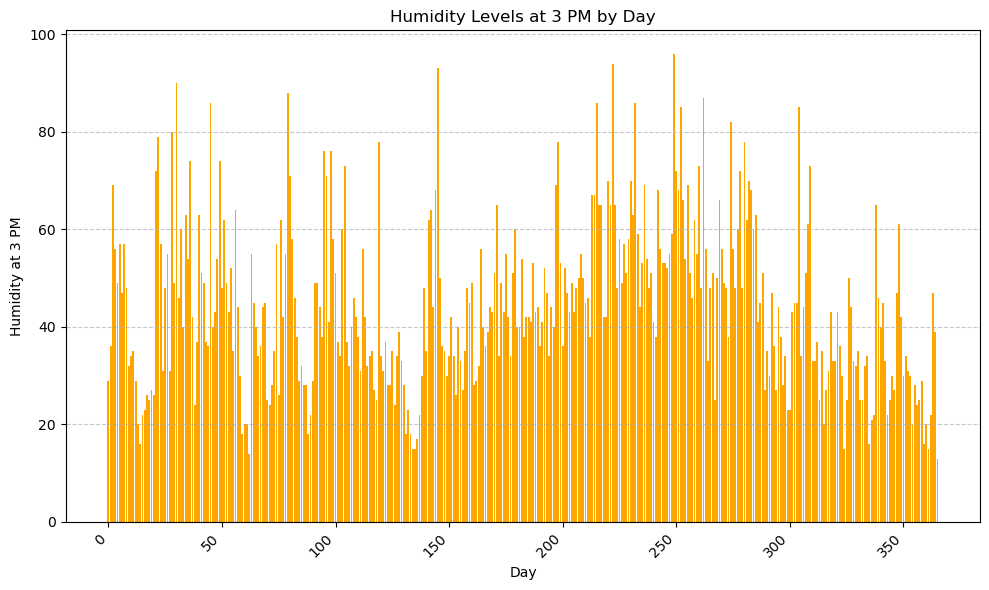

In [228]:
# 2. Exploratory Data Analysis (EDA) (20 Marks)
# Summary statistics and dataset description (10 Marks)
summary_stats = weather_data.describe() # this will showcase the means, standard deviation, and more statistics in a table
print(summary_stats)

# Visualize distributions of key variables (e.g., temperature, humidity) (10 Marks)
# display the bar graph for a categorical variable (humidity at 3pm by day)
plt.figure(figsize=(10,6))
plt.bar(weather_data.index, weather_data['Humidity3pm'], color='orange')

# Add labels and title
plt.xlabel('Day')
plt.ylabel('Humidity at 3 PM')
plt.title('Humidity Levels at 3 PM by Day')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and add grid
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the graph
plt.show()

In [230]:
# 3. Feature Engineering (20 Marks)
# Normalize temperature and humidity columns manually
# formula for normalization: (x - min(x))/(max(x) - min(x))
weather_data['MinTemp_normalized'] = (df['MinTemp'] - weather_data['MinTemp'].min()) / (weather_data['MinTemp'].max() - weather_data['MinTemp'].min())
weather_data['MaxTemp_normalized'] = (weather_data['MaxTemp'] - weather_data['MaxTemp'].min()) / (weather_data['MaxTemp'].max() - weather_data['MaxTemp'].min())
weather_data['Humidity9am_normalized'] = (weather_data['Humidity9am'] - weather_data['Humidity9am'].min()) / (weather_data['Humidity9am'].max() - weather_data['Humidity9am'].min())
weather_data['Humidity3pm_normalized'] = (weather_data['Humidity3pm'] - weather_data['Humidity3pm'].min()) / (weather_data['Humidity3pm'].max() - weather_data['Humidity3pm'].min())

# Create `TempRange` (MaxTemp - MinTemp) and `AvgHumidity` (average of Humidity9am and Humidity3pm) (15 Marks)
# `TempRange` should be 'MaxTemp' - 'MinTemp'
weather_data['TempRange'] = weather_data['MaxTemp'] - weather_data['MinTemp']

# `AvgHumidity` is the average of Humidity at 9am and Humidity at 3pm
weather_data['AvgHumidity'] = (weather_data['Humidity9am'] + weather_data['Humidity3pm']) / 2

# Display the first few rows of the DataFrame to verify the changes
print(weather_data[['MinTemp_normalized', 'MaxTemp_normalized', 'TempRange', 'Humidity9am_normalized', 'Humidity3pm_normalized', 'AvgHumidity']].head())

   MinTemp_normalized  MaxTemp_normalized  TempRange  Humidity9am_normalized  \
0            0.507634            0.592199       16.3                0.507937   
1            0.736641            0.684397       12.9                0.698413   
2            0.725191            0.560284        9.7                0.730159   
3            0.709924            0.280142        2.2                0.412698   
4            0.492366            0.301418        8.5                0.507937   

   Humidity3pm_normalized  AvgHumidity  
0                0.192771         48.5  
1                0.277108         58.0  
2                0.674699         75.5  
3                0.518072         59.0  
4                0.433735         58.5  


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Temp3pm,RainToday,RISK_MM,RainTomorrow,MinTemp_normalized,MaxTemp_normalized,Humidity9am_normalized,Humidity3pm_normalized,TempRange,AvgHumidity
0,8.0,24.3,0.0,3.4,6.3,7,30.0,12,7,6.0,...,23.6,0,3.6,1,0.507634,0.592199,0.507937,0.192771,16.3,48.5
1,14.0,26.9,3.6,4.4,9.7,1,39.0,0,13,4.0,...,25.7,1,3.6,1,0.736641,0.684397,0.698413,0.277108,12.9,58.0
2,13.7,23.4,3.6,5.8,3.3,7,85.0,3,5,6.0,...,20.2,1,39.8,1,0.725191,0.560284,0.730159,0.674699,9.7,75.5
3,13.3,15.5,39.8,7.2,9.1,7,54.0,14,13,30.0,...,14.1,1,2.8,1,0.709924,0.280142,0.412698,0.518072,2.2,59.0
4,7.6,16.1,2.8,5.6,10.6,10,50.0,10,2,20.0,...,15.4,1,0.0,0,0.492366,0.301418,0.507937,0.433735,8.5,58.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,9.0,30.7,0.0,7.6,12.1,6,76.0,10,7,7.0,...,30.0,0,0.0,0,0.545802,0.819149,0.031746,0.024096,21.7,26.5
362,7.1,28.4,0.0,11.6,12.7,3,48.0,6,6,2.0,...,28.2,0,0.0,0,0.473282,0.737589,0.142857,0.108434,21.3,33.5
363,12.5,19.9,0.0,8.4,5.3,2,43.0,1,1,11.0,...,18.3,0,0.0,0,0.679389,0.436170,0.428571,0.409639,7.4,55.0
364,12.5,26.9,0.0,5.0,7.1,7,46.0,11,14,6.0,...,25.9,0,0.0,0,0.679389,0.684397,0.523810,0.313253,14.4,54.0


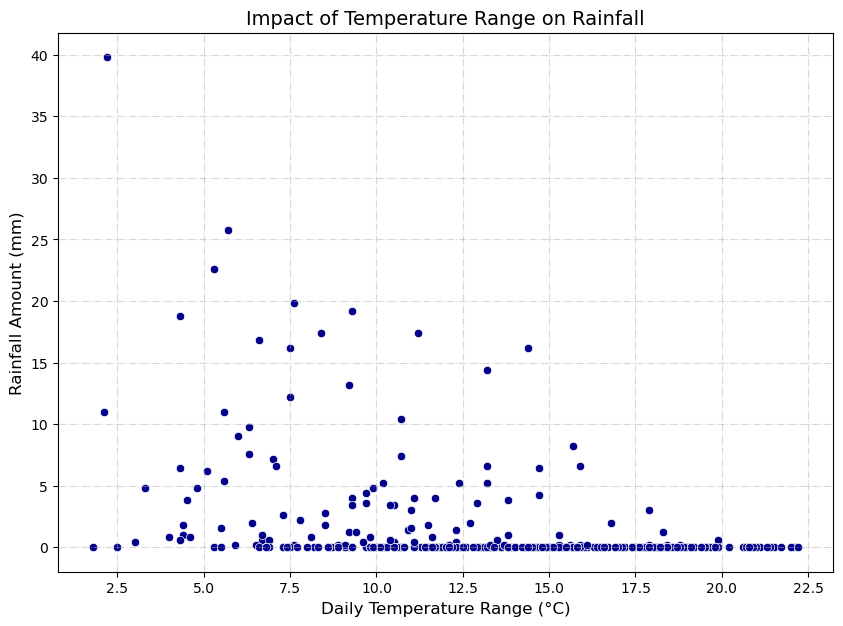

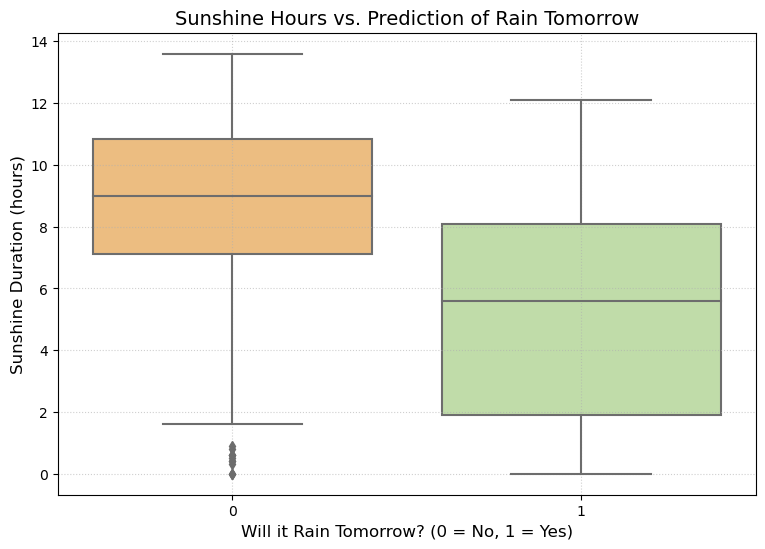

In [232]:
# 4. Advanced Visualizations (15 Marks)
# making 2 new features:
# TempRange (which will be the difference between MaxTemp and MinTemp)
# AvgHumidity (which will be the average of Humidity at 9am and 3pm)
weather_data['TempRange'] = weather_data['MaxTemp'] - weather_data['MinTemp']
weather_data['AvgHumidity'] = (weather_data['Humidity9am'] + weather_data['Humidity3pm']) / 2

# Scatterplot: TempRange vs. Rainfall (7 Marks)
# creating a scatterplot to visualize TempRange and compare it with the amount of Rainfall
plt.figure(figsize=(10, 7)) 
sns.scatterplot(x='TempRange', y='Rainfall', data=weather_data, color='darkblue') 
plt.title('Impact of Temperature Range on Rainfall', fontsize=14)
plt.xlabel('Daily Temperature Range (°C)', fontsize=12)
plt.ylabel('Rainfall Amount (mm)', fontsize=12)
plt.grid(True, linestyle='-.', alpha=0.5) 
plt.show()

# Boxplot: Sunshine vs. RainTomorrow (8 Marks)
# comparing Sunshine hours with whether or not it rained the following day (RainTomorrow)
plt.figure(figsize=(9, 6))  # Adjusting figure size
sns.boxplot(x='RainTomorrow', y='Sunshine', data=weather_data, palette='Spectral') 
plt.title('Sunshine Hours vs. Prediction of Rain Tomorrow', fontsize=14)
plt.xlabel('Will it Rain Tomorrow? (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Sunshine Duration (hours)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)  # dotted line grid
plt.show()

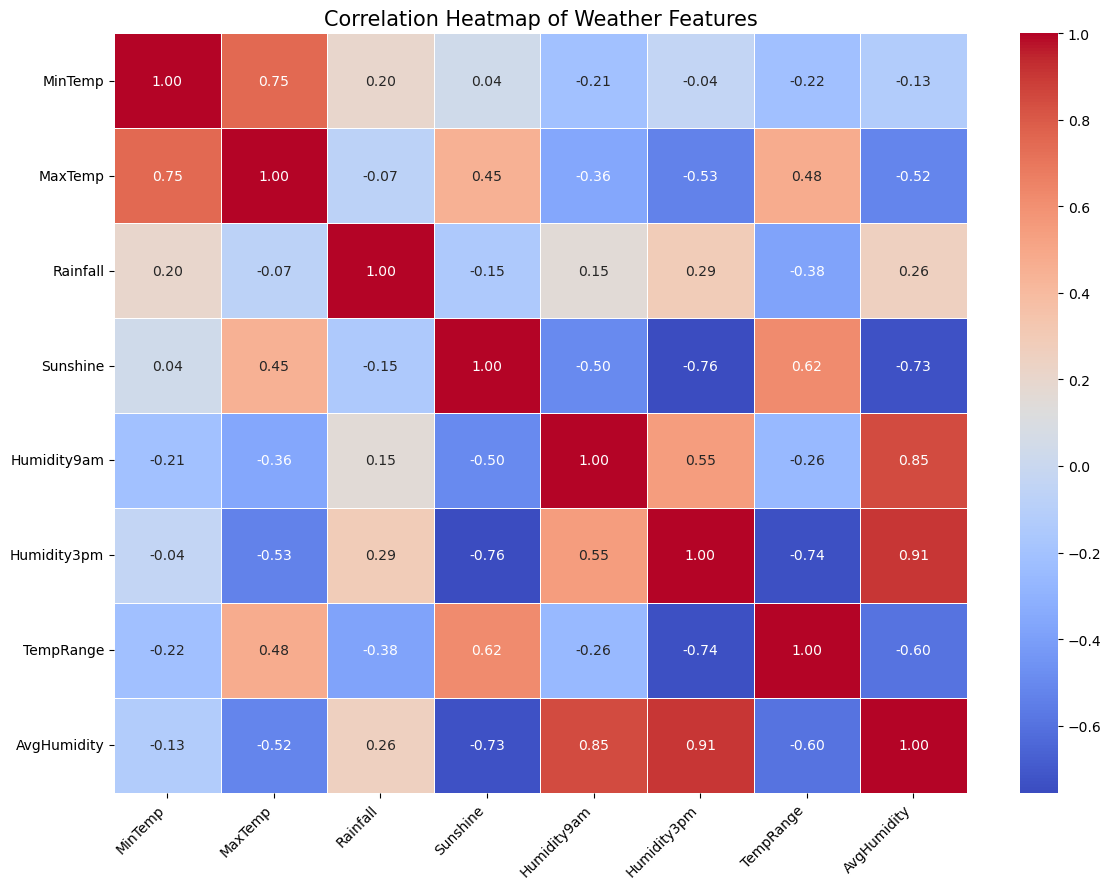

In [234]:
# 5. Correlation Analysis (10 Marks)
# Create a correlation heatmap, including new features (10 Marks)
corr_matrix = weather_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'TempRange', 'AvgHumidity']].corr()

# turning matrix into a heatmap
plt.figure(figsize=(12, 9))  # Adjusted the figure size slightly for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.7)

# making heading "correlation heatmap of weather features"
plt.title('Correlation Heatmap of Weather Features', fontsize=15)
plt.xticks(rotation=45, ha='right')  # tilting x-axis labels at a 45 degree angle to make it easier for people to read
plt.tight_layout()

# Show the heatmap
plt.show()

In [236]:
# 6. Regular Expressions (15 Marks)
# Extract wind directions starting with 'N' (5 Marks)
# first, reload the dataset since I overwrote WindDir9am column data with numeric values in the first part
weather_data = pd.read_csv("weather_500_project.csv")

# find out what wind directions begin with 'N'
winddirect_firstletter_n = weather_data['WindDir9am'].str.extract(r'^(N\w*)')
winddirect_firstletter_n = winddirect_firstletter_n.dropna() # do this to remove rows that don’t match the regex pattern (values that don't start with 'N', and null/NAN values)

# Display the extracted values that start with 'N'
print(f"Wind directions that begin with the letter 'N': ", winddirect_firstletter_n)

Wind directions that begin with the letter 'N':         0
2      N
18   NNE
19   NNW
20     N
33    NW
..   ...
348  NNE
352    N
359    N
362  NNW
365   NW

[109 rows x 1 columns]


In [238]:
# Clean WindDir9am column using regex (10 Marks)
# using regex to remove any non-alphabetic characters or whitespace from the WindDir9am column
weather_data['WindDir9am_cleaned'] = weather_data['WindDir9am'].str.replace(r'[^a-zA-Z]', '', regex=True)

# show the first few rows of the cleaned WindDir9am column
print("\nCleaned WindDir9am column:")
print(weather_data[['WindDir9am', 'WindDir9am_cleaned']].head())


Cleaned WindDir9am column:
  WindDir9am WindDir9am_cleaned
0         SW                 SW
1          E                  E
2          N                  N
3        WNW                WNW
4        SSE                SSE


## Bonus Section: Naive Bayes Classification (Optional for Extra Credit - 20 Marks)
Key Outputs and Marking (20 Marks Total):
1. Data Preparation (5 Marks): Clean and preprocess the dataset, handling missing values and selecting appropriate features.
3. Model Implementation(5 Marks): Build a Naive Bayes classifier to predict `RainTomorrow`.
4. Evaluation(5 Marks): Measure the performance using accuracy, confusion matrix, and other relevant metrics.
5. Visualization (3 Marks): Visualize key results, including a confusion matrix heatmap.
6. Analysis & Insights (2 Marks): Provide insights based on the model's performance.

Accuracy: 0.80

Confusion Matrix:
[[80 12]
 [10  8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        92
           1       0.40      0.44      0.42        18

    accuracy                           0.80       110
   macro avg       0.64      0.66      0.65       110
weighted avg       0.81      0.80      0.80       110



/var/folders/63/f484148s6l19wgyrc6j0slhh0000gn/T/ipykernel_14443/313924957.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather_data.fillna(weather_data.mean(), inplace=True)


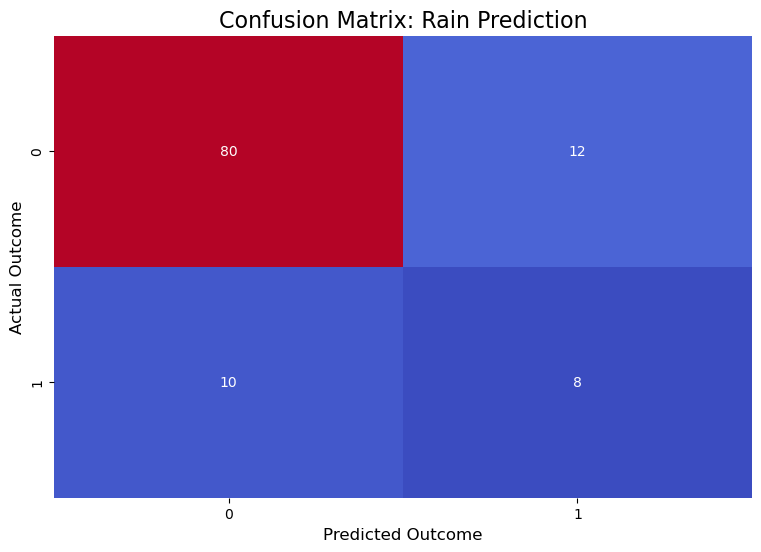


Analysis & Insights:
With an accuracy of 0.80, the model seems to do well in predicting when it won't rain(no), but not as well with predicting rain (yes).
Maybe adding other features like wind direction or sunshine could improve the model's accuracy, especially for rainy day predictions.


In [287]:
# reloading the dataset
weather_data = pd.read_csv("weather_500_project.csv")

# filling in missing values instead of dropping them
# i will use the mean for missing values so that no data gets lost
weather_data.fillna(weather_data.mean(), inplace=True)

# selecting features: 'Pressure9am' and 'Pressure3pm' instead of 'Sunshine'
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Pressure9am', 'Pressure3pm', 'WindSpeed9am', 'WindSpeed3pm']
X = weather_data[features]
y = weather_data['RainTomorrow'].replace({'Yes': 1, 'No': 0})  # encoding 'RainTomorrow' as 1 (Yes) and 0 (No)

# splitting the data into training and testing sets, keeping 30% for testing and set a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# training the naive bayes classifier on the training data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# making predictions on the test data
y_pred = nb_model.predict(X_test)

# evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# printing the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

# visualizing the confusion matrix with a heatmap
plt.figure(figsize=(9, 6)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm', cbar=False) 
plt.title('Confusion Matrix: Rain Prediction', fontsize=16)
plt.xlabel('Predicted Outcome', fontsize=12)
plt.ylabel('Actual Outcome', fontsize=12)
plt.show()

# final insights and analysis
print("\nAnalysis & Insights:")
print(f"With an accuracy of {accuracy:.2f}, the model seems to do well in predicting when it won't rain(no), but not as well with predicting rain (yes).")
print("Maybe adding other features like wind direction or sunshine could improve the model's accuracy, especially for rainy day predictions.")